# Classification

Setting up environment for modeling. Explore the data to understand feature correlations, determine which features to include and running different models to find the best fit. 

Models Attempted:

- [**Logistic Regression**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

- [**Decision Trees**](https://scikit-learn.org/stable/modules/tree.html)

- [**Gradient Boosting**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

- [**Random Forest**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

- [**Extra Trees**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)

# **Load Adjusted Dataset**

The original dataset on Kaggle removed a large amount of weather data during the final data cleaning steps. In order to improve our weather based predictions we re-ran the data collection process and re-included removed data points.

### Preview of available data

In [2]:
#load data into pandas

# importing the module
import pandas as pd

flight_data = pd.read_csv('data/train.csv')

In [2]:
pd.set_option('display.max_columns', None)
flight_data.head() #display sample dataframe

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,TAVG,TMIN,WT01,WT02,WT03,WT05,WT07,WT08,WT09,WT10,WT11,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
0,7,7,0,1500-1559,3,3,26,160,American Airlines Inc.,19534,79247,7972,2006675,11744595,0.000098,0.000177,6,Douglas Municipal,35.219,-80.936,Chicago O'Hare International,0.00,0.0,0.0,95.0,4.25,83.0,75.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.237709,0.273236,0.222538,0.255479
1,4,1,0,1300-1359,4,4,63,50,SkyWest Airlines Inc.,18788,67082,3655,2743323,3472966,0.000034,0.000099,15,Stapleton International,39.774,-104.880,El Paso International,0.00,0.0,0.0,71.0,11.41,57.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.154651,0.121849,0.237972,0.197503
2,11,4,0,0001-0559,2,1,3,76,American Eagle Airlines Inc.,1148,25517,300,90547,1204766,0.000348,0.000107,3,Adams Field,34.729,-92.234,NONE,0.00,0.0,0.0,54.0,0.45,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.117559,0.187867,0.139886,0.060327
3,3,2,0,1500-1559,7,5,14,143,Southwest Airlines Co.,7612,114119,3282,1023434,13382999,0.000062,0.000099,19,San Diego International Lindbergh Fl,32.733,-117.187,San Jose International,0.00,0.0,0.0,64.0,8.05,60.0,56.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.204389,0.141446,0.132868,0.202037
4,7,3,0,0800-0859,1,2,85,50,American Eagle Airlines Inc.,29376,28267,6058,3103410,1204766,0.000348,0.000107,15,Chicago O'Hare International,41.978,-87.906,Cincinnati/Northern Kentucky International,0.01,0.0,0.0,94.0,10.51,83.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.203263,0.193761,0.203027,0.113050


In [3]:
print("Available data points within dataset:")
for col in flight_data.columns: 
    print(col)

Available data points within dataset:
MONTH
DAY_OF_WEEK
DEP_DEL15
DEP_TIME_BLK
DISTANCE_GROUP
SEGMENT_NUMBER
CONCURRENT_FLIGHTS
NUMBER_OF_SEATS
CARRIER_NAME
AIRPORT_FLIGHTS_MONTH
AIRLINE_FLIGHTS_MONTH
AIRLINE_AIRPORT_FLIGHTS_MONTH
AVG_MONTHLY_PASS_AIRPORT
AVG_MONTHLY_PASS_AIRLINE
FLT_ATTENDANTS_PER_PASS
GROUND_SERV_PER_PASS
PLANE_AGE
DEPARTING_AIRPORT
LATITUDE
LONGITUDE
PREVIOUS_AIRPORT
PRCP
SNOW
SNWD
TMAX
AWND
TAVG
TMIN
WT01
WT02
WT03
WT05
WT07
WT08
WT09
WT10
WT11
CARRIER_HISTORICAL
DEP_AIRPORT_HIST
DAY_HISTORICAL
DEP_BLOCK_HIST


Exploration of the major airlines covered by the data

## Set up Environment

In [ ]:
# Pre-requisites
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Store the classifier models to save time
import joblib

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifiers from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Performance metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from scipy.stats import pointbiserialr

## Determine how many observations fall under each class 
### 0 : not delayed 1 : delayed

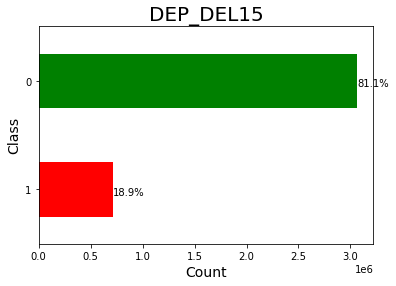

0    3066926
1     714601
Name: DEP_DEL15, dtype: int64


In [ ]:
# Plotting the percentage of observations that fall under each class
ax = flight_data["DEP_DEL15"].value_counts().sort_values().plot(kind="barh", color=["r", "g"])
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
plt.title("DEP_DEL15", fontsize=20)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Class", fontsize=14)
plt.show()
print(flight_data["DEP_DEL15"].value_counts())
fig = ax.get_figure()

## Point Biserial Correlation for Quantitative, Continuous Features with DEP_DEL15

A correlation coefficient measures the extent to which two variables tend to change together. The coefficient describes both the strength and the direction of the relationship.

A point-biserial correlation is used to measure the strength and direction of the association that exists between one continuous variable and one dichotomous variable.  [Interpreting PBC](https://www.scalestatistics.com/point-biserial.html)

We see that the highest correlation for DEP_DEL15 is with WTO3 (Thunder), PRCP (precipitation) and WT01 (fog).

In [18]:
#Encode to numerical values 
labelEncoder = LabelEncoder()
flight_data["CARRIER_NAME"] = labelEncoder.fit_transform(flight_data["CARRIER_NAME"])
flight_data["PREVIOUS_AIRPORT"] = labelEncoder.fit_transform(flight_data["PREVIOUS_AIRPORT"])
flight_data["DEPARTING_AIRPORT"] = labelEncoder.fit_transform(flight_data["DEPARTING_AIRPORT"])
flight_data["DEP_TIME_BLK"] = labelEncoder.fit_transform(flight_data["PREVIOUS_AIRPORT"])

# get continuous and dichotomous data
categorical = ["DEP_DEL15","MONTH","DAY_OF_WEEK","DEP_TIME_BLK","DISTANCE_GROUP","SEGMENT_NUMBER","CONCURRENT_FLIGHTS","NUMBER_OF_SEATS","CARRIER_NAME","AIRPORT_FLIGHTS_MONTH","AIRLINE_FLIGHTS_MONTH","AIRLINE_AIRPORT_FLIGHTS_MONTH","AVG_MONTHLY_PASS_AIRPORT","AVG_MONTHLY_PASS_AIRLINE", "FLT_ATTENDANTS_PER_PASS",
"GROUND_SERV_PER_PASS","PLANE_AGE","DEPARTING_AIRPORT","LATITUDE","LONGITUDE","PREVIOUS_AIRPORT","CARRIER_HISTORICAL","DEP_AIRPORT_HIST","DAY_HISTORICAL","DEP_BLOCK_HIST"]
numeric = ["PRCP", "SNOW", "SNWD", "TMAX", "AWND","TAVG","TMIN","WT01","WT02","WT03","WT05","WT07","WT08","WT09","WT10","WT11"]
target = flight_data["DEP_DEL15"]

# pbc of first question
pbc = list()
for col in numeric:
    ans = pointbiserialr(flight_data[col], target)
    pbc.append([col, ans[0], ans[1]])
    
pbc_corr = pd.DataFrame(pbc, columns=["Feature", "CorrCoeff", "pValue"]).sort_values(by="CorrCoeff", ascending=False).reset_index(drop=True)
pbc_corr

,Feature,CorrCoeff,pValue
0,WT03,0.087747,0.000000e+00
1,PRCP,0.080137,0.000000e+00
2,WT01,0.068952,0.000000e+00
3,AWND,0.050673,0.000000e+00
4,SNOW,0.050223,0.000000e+00
5,WT02,0.026787,0.000000e+00
6,SNWD,0.026357,0.000000e+00
7,WT09,0.021574,0.000000e+00
8,WT05,0.017079,6.493422e-242
9,WT08,0.016897,8.224131e-237


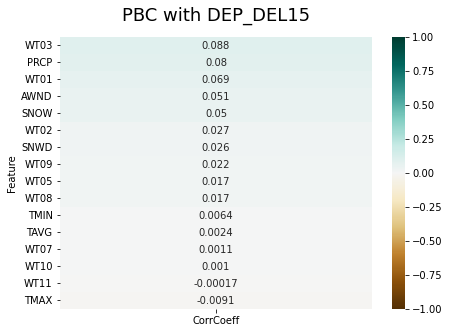

In [16]:
plt.figure(figsize=(7, 5))
pbc_corr = pbc_corr.set_index("Feature")
heatmap = sns.heatmap(pbc_corr[["CorrCoeff"]].sort_values(by="CorrCoeff", ascending=False), vmin=-1, vmax=1, annot=True, cmap="BrBG")
heatmap.set_title("PBC with DEP_DEL15", fontdict={"fontsize":18}, pad=16);


## Spearman Coefficient with categorical data

Weather is not the only factor that causes delays. We can see here that there is a strong correlation between Carrier Historical delays and Departing Airport Historical delays and the likelihood of a departure delay.

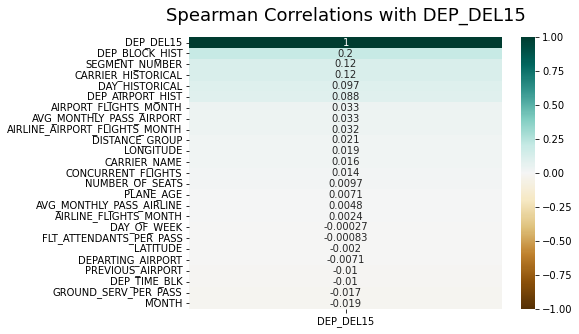

In [17]:
plt.figure(figsize=(7, 5))
heatmap = sns.heatmap(flight_data[categorical].corr(method="spearman")[["DEP_DEL15"]].sort_values(by="DEP_DEL15", ascending=False), vmin=-1, vmax=1, annot=True, cmap="BrBG")
heatmap.set_title("Spearman Correlations with DEP_DEL15", fontdict={"fontsize":18}, pad=16)
plt.savefig("data/Img/05_03_Spearman_Dep_Del15.png")
del heatmap

## Feature Selection

1. Clean up non-numerical values and remove any problematic NA values.
2. Obtain and visualize feature importance ranking
3. Select features based on importance ranking

In [20]:
#Encode to numerical values 
labelEncoder = LabelEncoder()
flight_data["CARRIER_NAME"] = labelEncoder.fit_transform(flight_data["CARRIER_NAME"])
flight_data["PREVIOUS_AIRPORT"] = labelEncoder.fit_transform(flight_data["PREVIOUS_AIRPORT"])
flight_data["DEPARTING_AIRPORT"] = labelEncoder.fit_transform(flight_data["DEPARTING_AIRPORT"])
flight_data["DEP_TIME_BLK"] = labelEncoder.fit_transform(flight_data["DEP_TIME_BLK"])

#Convert all data to numeric
flight_data = flight_data.apply(pd.to_numeric)

# check for nulls
nan_in_df = flight_data.isnull().sum().sum()
print('Number of NaN values present: ' + str(nan_in_df))
 
flight_data.dropna(subset=['DEP_AIRPORT_HIST','DAY_HISTORICAL','DEP_BLOCK_HIST'], inplace=True)

nan_in_df = flight_data.isnull().sum().sum()
print('Number of NaN values present: ' + str(nan_in_df))

Number of NaN values present: 0
Number of NaN values present: 0


### What happens if we look at weather data alone as features?

Is historical weather data enough to adequately predict flight delays?

In [26]:
#Select all data as features
X = flight_data[["PRCP", "SNOW", "SNWD", "TMAX", "AWND","TAVG","TMIN","WT01","WT02","WT03","WT05","WT07","WT08","WT09","WT10","WT11"]]

#Standardize weather data
XNormed = (X - X.mean())/(X.std())

y = np.asarray(flight_data["DEP_DEL15"])

model = RandomForestClassifier(n_estimators=100,
                       criterion="entropy", random_state=42, n_jobs=-1)

model.fit(XNormed, y)

importances = model.feature_importances_
importances

array([1.34270495e-01, 2.40362392e-02, 8.83654491e-03, 1.86486771e-01,
       2.16412295e-01, 1.35264034e-01, 1.76968047e-01, 2.84494142e-02,
       7.34213731e-03, 6.57480856e-02, 1.40150292e-03, 1.75995298e-04,
       1.35287191e-02, 9.88949435e-04, 8.11891432e-05, 9.58064911e-06])

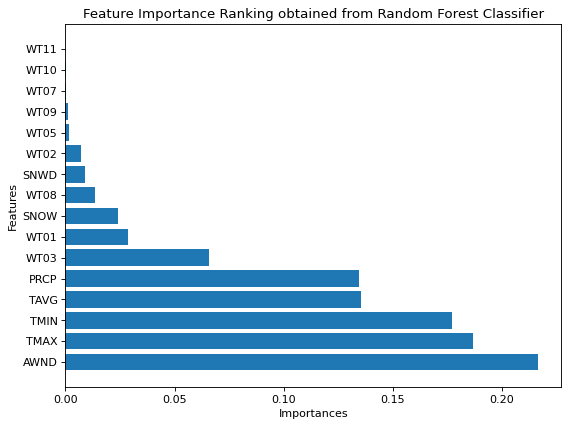

In [27]:
importances = pd.DataFrame({
    "Feature": list(XNormed.columns),
    "Importance": model.feature_importances_
})
importances = importances.sort_values(by="Importance", ascending=False)
importances = importances.set_index("Feature")
importances
plt.figure(figsize=(8, 6), dpi=80)
plt.barh(importances.index, importances.Importance)
plt.title("Feature Importance Ranking obtained from Random Forest Classifier", fontsize=12)
plt.xlabel("Importances")
plt.ylabel("Features")
plt.savefig("data/Img/05_04_Feature_Importances_RFC.png")

Based on these results we will remove W11, W10, W07 from features.

In [30]:
#Select relevant data as features
X = flight_data[["PRCP", "SNOW", "SNWD", "TMAX", "AWND","TAVG","TMIN","WT01","WT02","WT03","WT05","WT08","WT09"]]

#Standardize weather data
XNormed = (X - X.mean())/(X.std())

y = np.asarray(flight_data["DEP_DEL15"])

model = RandomForestClassifier(n_estimators=100,
                       criterion="entropy", random_state=42, n_jobs=-1)

model.fit(XNormed, y)

importances = model.feature_importances_
importances

array([0.14703409, 0.02107849, 0.00872012, 0.18543843, 0.21710631,
       0.13540567, 0.17865914, 0.02852075, 0.00740929, 0.05445204,
       0.00156343, 0.01342461, 0.00118763])

In [31]:
# Number of samples/observations/rows is greater than 100,000
print(f"\nDataset shape: {XNormed.shape}")
features_train, features_test, labels_train, labels_test = train_test_split(XNormed, y, test_size=0.80, random_state=42)
print(f"features_train shape: {features_train.shape} | features_test shape: {features_test.shape}")
print(f"labels_train shape: {labels_train.shape} | labels_test shape: {labels_test.shape}")


Dataset shape: (3781526, 13)
features_train shape: (756305, 13) | features_test shape: (3025221, 13)
labels_train shape: (756305,) | labels_test shape: (3025221,)


### Logistic Regression Model with Weather Features

[[2450983    2403]
 [ 569826    2009]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.90   2453386
           1       0.46      0.00      0.01    571835

    accuracy                           0.81   3025221
   macro avg       0.63      0.50      0.45   3025221
weighted avg       0.74      0.81      0.73   3025221



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


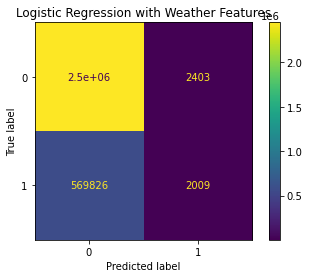

In [34]:
model = LogisticRegression(solver='lbfgs', max_iter = 500)
model.fit(features_train, labels_train)
joblib.dump(model, "data/Classifiers/LogisticRegression.joblib")
#model = joblib.load("data/Classifiers/LogisticRegression.joblib")

model_pred = model.predict(features_test)
print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Logistic Regression with Weather Features")
print(conf_mat_plot)
plt.savefig("data/Img/05_06_LogRegression_Weather")

### Decision Tree Classifier with Weather Features

              precision    recall  f1-score   support

           0       0.82      0.99      0.89   2453386
           1       0.50      0.06      0.10    571835

    accuracy                           0.81   3025221
   macro avg       0.66      0.52      0.50   3025221
weighted avg       0.76      0.81      0.74   3025221



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


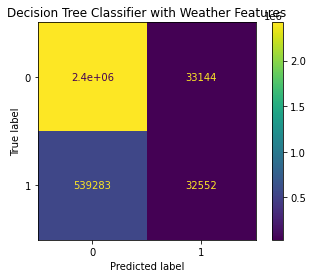

In [35]:
model = DecisionTreeClassifier()
model.fit(features_train, labels_train)
joblib.dump(model, "data/Classifiers/DecisionTreeClassifier.joblib")
#model = joblib.load("data/Classifiers/DecisionTreeClassifier.joblib")

model_pred = model.predict(features_test)
# print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Decision Tree Classifier with Weather Features")
print(conf_mat_plot)
plt.savefig("data/Img/05_06_DTC_Confusion_Matrix_Weather")


## Gradient Boosting with Weather Features

              precision    recall  f1-score   support

           0       0.81      1.00      0.90   2453386
           1       0.64      0.00      0.01    571835

    accuracy                           0.81   3025221
   macro avg       0.73      0.50      0.45   3025221
weighted avg       0.78      0.81      0.73   3025221



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


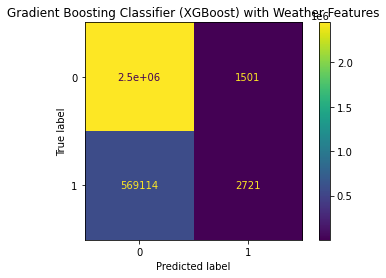

In [36]:
model = GradientBoostingClassifier()
model.fit(features_train, labels_train)
joblib.dump(model, "data/Classifiers/GradientBoostingClassifier.joblib")
#model = joblib.load("data/Classifiers/GradientBoostingClassifier.joblib")
model_pred = model.predict(features_test)
# print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Gradient Boosting Classifier (XGBoost) with Weather Features")
print(conf_mat_plot)
plt.savefig("data/Img/05_06_GradientBoost_Weather")

## Random Forest with Weather Features

Increased default size of trees to improve accuracy.

[[2415297   38089]
 [ 537114   34721]]
              precision    recall  f1-score   support

           0       0.82      0.98      0.89   2453386
           1       0.48      0.06      0.11    571835

    accuracy                           0.81   3025221
   macro avg       0.65      0.52      0.50   3025221
weighted avg       0.75      0.81      0.75   3025221



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


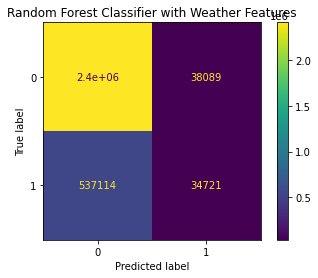

In [37]:
model = RandomForestClassifier(n_estimators = 500, n_jobs=-1)
model.fit(features_train, labels_train)
joblib.dump(model, "data/Classifiers/RandomForestClassifier.joblib")
#model = joblib.load("data/Classifiers/RandomForestClassifier.joblib")
model_pred = model.predict(features_test)
print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Random Forest Classifier with Weather Features")
print(conf_mat_plot)
plt.savefig("data/Img/05_08_RFC_Confusion_Matrix_Weather")
del model
del model_pred

## Extra Trees

Increased default size of trees to improve accuracy.

[[2420268   33118]
 [ 539286   32549]]
              precision    recall  f1-score   support

           0       0.82      0.99      0.89   2453386
           1       0.50      0.06      0.10    571835

    accuracy                           0.81   3025221
   macro avg       0.66      0.52      0.50   3025221
weighted avg       0.76      0.81      0.74   3025221



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


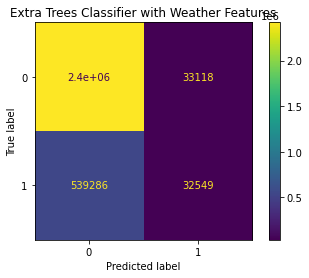

In [38]:
model = ExtraTreesClassifier(n_jobs=-1,n_estimators = 500)
model.fit(features_train, labels_train)
joblib.dump(model, "data/Classifiers/ExtraTreesClassifier.joblib")
# model = joblib.load("./Classifiers/ExtraTreesClassifier.joblib")
model_pred = model.predict(features_test)
print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Extra Trees Classifier with Weather Features")
print(conf_mat_plot)
plt.savefig("data/Img/05_09_ETC_Confusion_Matrix_Weather")

## Result

Running our models based only on the weather variables did not produce very good prediction results. 

|     Classification Model     |  |      |        |      |  Performance Metric        |      |          |   |
|:----------------------------:|:------------------:|:----:|:------:|:----:|:--------:|:----:|:--------:|:-:|
|                              |      Precision     |      | Recall |      | F1 Score |      | Accuracy |   |
|                              |         0.0        |  1.0 |   0.0  |  1.0 |    0.0   |  1.0 |          |   |
|      Logistic Regression     | 0.81               | 0.45 | 1.00   | 0.00 | 0.90     | 0.01 | 0.81     |   |
|   Decision Tree Classifier   | 0.82               | 0.49 | 0.99   | 0.06 | 0.89     | 0.10 | 0.81     |   |
|    Extra Trees Classifier    | 0.82               | 0.49 | 0.99   | 0.06 | 0.189    | 0.10 | 0.81     |   |
| Gradient Boosting Classifier | 0.81               | 0.64 | 1.00   | 0.00 | 0.90     | 0.01 | 0.81     |   |
|   Random Forest Classifier   | 0.82               | 0.48 | 0.98   | 0.06 | 0.89     | 0.11 | 0.81     |   |

In [39]:
# Setup
perf_df = pd.DataFrame(columns=["classifiers", "fpr", "tpr", "auc"])

# Handling Extra Trees Classifier separately due to memory constraints
fpr, tpr, _ = roc_curve(labels_test,  model_pred)
auc = roc_auc_score(labels_test, model_pred)
# Record the results
perf_df = perf_df.append({"classifiers": "ExtraTreesClassifier",
                                        "fpr": fpr, 
                                        "tpr": tpr, 
                                        "auc": auc}, ignore_index=True)
del model
del model_pred

classifiers = ["LogisticRegression", "DecisionTreeClassifier", "GradientBoostingClassifier", "RandomForestClassifier"]
for clf in classifiers:
    # Load the trained classifiers
    model = joblib.load(f"data/Classifiers/{clf}.joblib")
    model_pred = model.predict(features_test)
    fpr, tpr, _ = roc_curve(labels_test,  model_pred)
    auc = roc_auc_score(labels_test, model_pred)
    # Record the results
    perf_df = perf_df.append({"classifiers": clf,
                                        "fpr": fpr, 
                                        "tpr": tpr, 
                                        "auc": auc}, ignore_index=True)
    del model
    del model_pred

# Set name of the classifiers as index labels
perf_df.set_index("classifiers", inplace=True)

/var/folders/kr/95x94ckx3m757jtk_tm0rz780000gn/T/ipykernel_17037/902646317.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_df = perf_df.append({"classifiers": "ExtraTreesClassifier",
/var/folders/kr/95x94ckx3m757jtk_tm0rz780000gn/T/ipykernel_17037/902646317.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_df = perf_df.append({"classifiers": clf,
/var/folders/kr/95x94ckx3m757jtk_tm0rz780000gn/T/ipykernel_17037/902646317.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_df = perf_df.append({"classifiers": clf,
/var/folders/kr/95x94ckx3m757jtk_tm0rz780000gn/T/ipykernel_17037/902646317.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

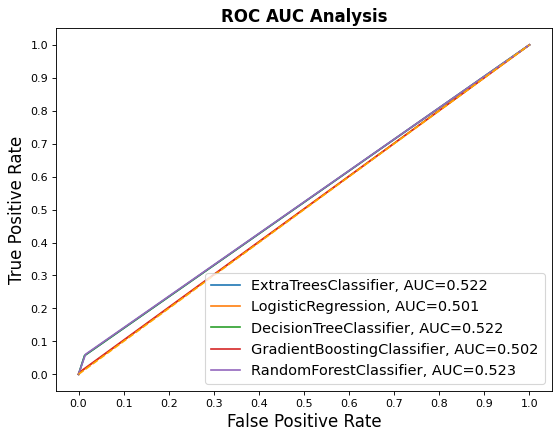

In [40]:
fig = plt.figure(figsize=(8,6), dpi=80)
for clf_name in perf_df.index:
    plt.plot(perf_df.loc[clf_name]["fpr"], 
             perf_df.loc[clf_name]["tpr"], 
             label="{}, AUC={:.3f}".format(clf_name, perf_df.loc[clf_name]["auc"]))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title("ROC AUC Analysis", fontweight="bold", fontsize=15)
plt.legend(prop={"size":13}, loc="lower right")

plt.show()
fig.savefig("data/Img/05_10_Classifiers_ROC_AUC.png")

## Is weather data alone providing an accurate prediction?

No, weather data alone is not providing an accurate prediction. How can we better understand this result? Reading up on the underlying causes of flight delays from the [Bureau of Transportation](https://www.bts.gov/topics/airlines-and-airports/understanding-reporting-causes-flight-delays-and-cancellations) gives us some insight.

There are 2 kinds of weather delays. 1 - Extreme Weather (weather so severe it prevents flying). 2 - National Air System related weather delays. NAS delays slow down flight operations but do not prevent flying. These types of delays, according to the BTS, can be improved upon by action from the carriers or Federal Aviation Administration. They are combined with other types of delays in the BTS data, but it is possible to estimate which percentage of these delays are likely caused by weather.

Combining these two kinds of weather delays, the BTS estimates that in 2019 (the year that our data was pulled from) 38.7% of flights had a weather related cause. We also know that some airlines and airports might be better equipped to ameliorate the effects of these delays. This means we need to include additional features to improve our results.

## Classification with All Available Data

In [42]:
#Select all data as features
X = flight_data[["MONTH","DAY_OF_WEEK","DEP_TIME_BLK","DISTANCE_GROUP","SEGMENT_NUMBER","CONCURRENT_FLIGHTS","NUMBER_OF_SEATS","CARRIER_NAME","AIRPORT_FLIGHTS_MONTH","AIRLINE_FLIGHTS_MONTH","AIRLINE_AIRPORT_FLIGHTS_MONTH","AVG_MONTHLY_PASS_AIRPORT","AVG_MONTHLY_PASS_AIRLINE", "FLT_ATTENDANTS_PER_PASS",
"GROUND_SERV_PER_PASS","PLANE_AGE","DEPARTING_AIRPORT","LATITUDE","LONGITUDE","PREVIOUS_AIRPORT","CARRIER_HISTORICAL","DEP_AIRPORT_HIST","DAY_HISTORICAL","DEP_BLOCK_HIST","PRCP", "SNOW", "SNWD", "TMAX", "AWND","TAVG","TMIN","WT01","WT02","WT03","WT05","WT07","WT08","WT09","WT10","WT11"]]

#Standardize weather data
XNormed = (X - X.mean())/(X.std())

y = np.asarray(flight_data["DEP_DEL15"])

model = RandomForestClassifier(n_estimators=100,
                       criterion="entropy", random_state=42, n_jobs=-1)

model.fit(XNormed, y)

importances = model.feature_importances_
importances

array([1.09882623e-02, 2.90164534e-02, 4.76608966e-02, 4.52316240e-02,
       3.59223921e-02, 6.66697955e-02, 3.45626137e-02, 6.90575954e-03,
       2.47395757e-02, 1.74878661e-02, 2.94992724e-02, 1.60559657e-02,
       7.43249699e-03, 6.23451528e-03, 7.08795801e-03, 7.15350600e-02,
       1.54324132e-02, 1.60691177e-02, 1.69602578e-02, 4.76253983e-02,
       2.32148650e-02, 5.32779821e-02, 4.06512294e-02, 8.27248749e-02,
       2.38405100e-02, 2.69261182e-03, 1.99728116e-03, 5.03903385e-02,
       5.64479479e-02, 4.05752695e-02, 4.90925857e-02, 6.84317113e-03,
       2.55309857e-03, 5.74600774e-03, 2.55937446e-04, 4.95522216e-05,
       6.29580642e-03, 2.21941702e-04, 1.02346883e-05, 1.05969733e-06])

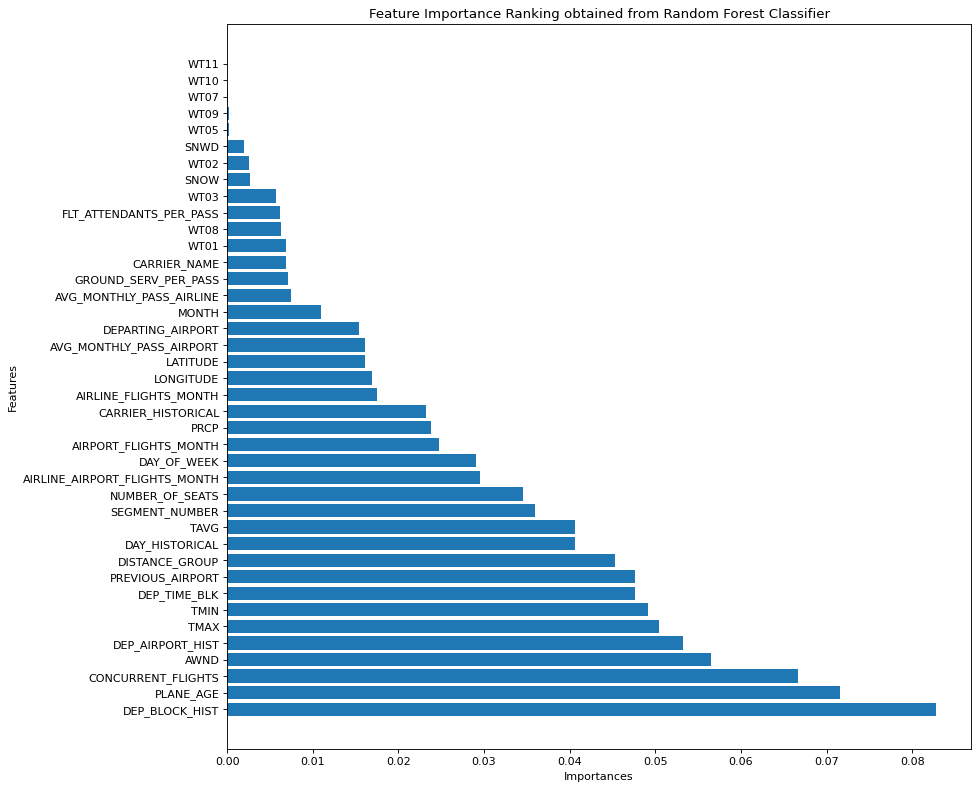

In [45]:
importances = pd.DataFrame({
    "Feature": list(XNormed.columns),
    "Importance": model.feature_importances_
})
importances = importances.sort_values(by="Importance", ascending=False)
importances = importances.set_index("Feature")
importances
plt.figure(figsize=(12, 12), dpi=80)
plt.barh(importances.index, importances.Importance)
plt.title("Feature Importance Ranking obtained from Random Forest Classifier", fontsize=12)
plt.xlabel("Importances")
plt.ylabel("Features")
plt.savefig("data/Img/05_04_Feature_Importances_RFC.png")

Based on this result we will remove W11, W10, W07, W09, W05 from features. We also note that non-weather related features have the higest importance - DEP_BLOCK_HIST, PLANE_AGE and CONCURRENT_FLIGHTS

In [46]:
#Select relevant data as features
X = flight_data[["MONTH","DAY_OF_WEEK","DEP_TIME_BLK","DISTANCE_GROUP","SEGMENT_NUMBER","CONCURRENT_FLIGHTS","NUMBER_OF_SEATS","CARRIER_NAME","AIRPORT_FLIGHTS_MONTH","AIRLINE_FLIGHTS_MONTH","AIRLINE_AIRPORT_FLIGHTS_MONTH","AVG_MONTHLY_PASS_AIRPORT","AVG_MONTHLY_PASS_AIRLINE", "FLT_ATTENDANTS_PER_PASS",
"GROUND_SERV_PER_PASS","PLANE_AGE","DEPARTING_AIRPORT","LATITUDE","LONGITUDE","PREVIOUS_AIRPORT","CARRIER_HISTORICAL","DEP_AIRPORT_HIST","DAY_HISTORICAL","DEP_BLOCK_HIST","PRCP", "SNOW", "SNWD", "TMAX", "AWND","TAVG","TMIN","WT01","WT02","WT03","WT08"]]

#Standardize weather data
XNormed = (X - X.mean())/(X.std())

y = np.asarray(flight_data["DEP_DEL15"])

model = RandomForestClassifier(n_estimators=100,
                       criterion="entropy", random_state=42, n_jobs=-1)

model.fit(XNormed, y)

importances = model.feature_importances_
importances

array([0.01126208, 0.029393  , 0.04681343, 0.04522703, 0.03551628,
       0.06712719, 0.03466082, 0.00692168, 0.02499158, 0.01778999,
       0.02963805, 0.01615322, 0.00728842, 0.00631442, 0.0072228 ,
       0.07129075, 0.01551708, 0.01612919, 0.01707127, 0.04653594,
       0.02297466, 0.05308491, 0.04105299, 0.08236618, 0.02398   ,
       0.00272568, 0.00206855, 0.05069029, 0.05648152, 0.04095478,
       0.04932005, 0.00688612, 0.00255334, 0.0056098 , 0.0063869 ])

In [47]:
# Number of samples/observations/rows is greater than 100,000
print(f"\nDataset shape: {XNormed.shape}")
features_train, features_test, labels_train, labels_test = train_test_split(XNormed, y, test_size=0.80, random_state=42)
print(f"features_train shape: {features_train.shape} | features_test shape: {features_test.shape}")
print(f"labels_train shape: {labels_train.shape} | labels_test shape: {labels_test.shape}")


Dataset shape: (3781526, 35)
features_train shape: (756305, 35) | features_test shape: (3025221, 35)
labels_train shape: (756305,) | labels_test shape: (3025221,)


## Logistic Regression with All Features

[[2440508   12878]
 [ 555442   16393]]
              precision    recall  f1-score   support

           0       0.81      0.99      0.90   2453386
           1       0.56      0.03      0.05    571835

    accuracy                           0.81   3025221
   macro avg       0.69      0.51      0.48   3025221
weighted avg       0.77      0.81      0.74   3025221



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


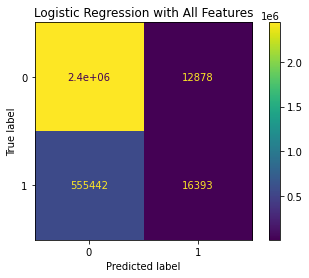

In [49]:
model = LogisticRegression(solver='lbfgs', max_iter = 500)
model.fit(features_train, labels_train)
joblib.dump(model, "data/Classifiers/LogisticRegression.joblib")
#model = joblib.load("data/Classifiers/LogisticRegression.joblib")

model_pred = model.predict(features_test)
print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Logistic Regression with All Features")
print(conf_mat_plot)
plt.savefig("data/Img/05_06_LogRegression")

## Decision Tree with All Features

              precision    recall  f1-score   support

           0       0.84      0.82      0.83   2453386
           1       0.29      0.32      0.30    571835

    accuracy                           0.73   3025221
   macro avg       0.56      0.57      0.57   3025221
weighted avg       0.73      0.73      0.73   3025221



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


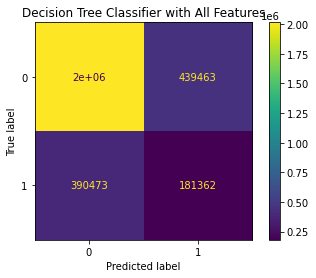

In [52]:
model = DecisionTreeClassifier()
model.fit(features_train, labels_train)
joblib.dump(model, "data/Classifiers/DecisionTreeClassifier.joblib")
#model = joblib.load("data/Classifiers/DecisionTreeClassifier.joblib")

model_pred = model.predict(features_test)
# print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Decision Tree Classifier with All Features")
print(conf_mat_plot)
plt.savefig("data/Img/05_06_DTC_Confusion_Matrix")


## Gradient Boosting with All Features

              precision    recall  f1-score   support

           0       0.82      0.99      0.90   2453386
           1       0.64      0.05      0.09    571835

    accuracy                           0.82   3025221
   macro avg       0.73      0.52      0.50   3025221
weighted avg       0.78      0.82      0.75   3025221



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


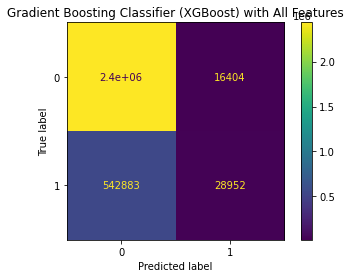

In [53]:
model = GradientBoostingClassifier()
model.fit(features_train, labels_train)
joblib.dump(model, "data/Classifiers/GradientBoostingClassifier.joblib")
#model = joblib.load("data/Classifiers/GradientBoostingClassifier.joblib")
model_pred = model.predict(features_test)
# print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Gradient Boosting Classifier (XGBoost) with All Features")
print(conf_mat_plot)
plt.savefig("data/Img/05_06_GradientBoost")

## Random Forest with All Features

[[2399514   53872]
 [ 491641   80194]]
              precision    recall  f1-score   support

           0       0.83      0.98      0.90   2453386
           1       0.60      0.14      0.23    571835

    accuracy                           0.82   3025221
   macro avg       0.71      0.56      0.56   3025221
weighted avg       0.79      0.82      0.77   3025221



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


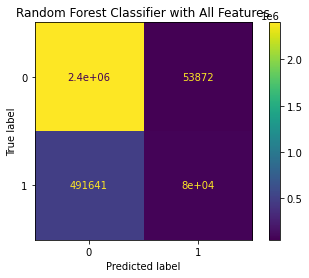

In [54]:
model = RandomForestClassifier(n_estimators = 500, n_jobs=-1)
model.fit(features_train, labels_train)
joblib.dump(model, "data/Classifiers/RandomForestClassifier.joblib")
#model = joblib.load("data/Classifiers/RandomForestClassifier.joblib")
model_pred = model.predict(features_test)
print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Random Forest Classifier with All Features")
print(conf_mat_plot)
plt.savefig("data/Img/05_08_RFC_Confusion_Matrix")
del model
del model_pred

## Extra Trees with All Features

[[2368007   85379]
 [ 480129   91706]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89   2453386
           1       0.52      0.16      0.24    571835

    accuracy                           0.81   3025221
   macro avg       0.67      0.56      0.57   3025221
weighted avg       0.77      0.81      0.77   3025221



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


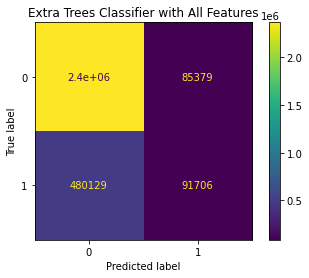

In [55]:
model = ExtraTreesClassifier(n_jobs=-1,n_estimators = 500)
model.fit(features_train, labels_train)
joblib.dump(model, "data/Classifiers/ExtraTreesClassifier.joblib")
# model = joblib.load("./Classifiers/ExtraTreesClassifier.joblib")
model_pred = model.predict(features_test)
print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Extra Trees Classifier with All Features")
print(conf_mat_plot)
plt.savefig("data/Img/05_09_ETC_Confusion_Matrix")

In [56]:
# Setup
perf_df = pd.DataFrame(columns=["classifiers", "fpr", "tpr", "auc"])

# Handling Extra Trees Classifier separately due to memory constraints
fpr, tpr, _ = roc_curve(labels_test,  model_pred)
auc = roc_auc_score(labels_test, model_pred)
# Record the results
perf_df = perf_df.append({"classifiers": "ExtraTreesClassifier",
                                        "fpr": fpr, 
                                        "tpr": tpr, 
                                        "auc": auc}, ignore_index=True)
del model
del model_pred

classifiers = ["LogisticRegression", "DecisionTreeClassifier", "GradientBoostingClassifier", "RandomForestClassifier"]
for clf in classifiers:
    # Load the trained classifiers
    model = joblib.load(f"data/Classifiers/{clf}.joblib")
    model_pred = model.predict(features_test)
    fpr, tpr, _ = roc_curve(labels_test,  model_pred)
    auc = roc_auc_score(labels_test, model_pred)
    # Record the results
    perf_df = perf_df.append({"classifiers": clf,
                                        "fpr": fpr, 
                                        "tpr": tpr, 
                                        "auc": auc}, ignore_index=True)
    del model
    del model_pred

# Set name of the classifiers as index labels
perf_df.set_index("classifiers", inplace=True)

/var/folders/kr/95x94ckx3m757jtk_tm0rz780000gn/T/ipykernel_17037/902646317.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_df = perf_df.append({"classifiers": "ExtraTreesClassifier",
/var/folders/kr/95x94ckx3m757jtk_tm0rz780000gn/T/ipykernel_17037/902646317.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_df = perf_df.append({"classifiers": clf,
/var/folders/kr/95x94ckx3m757jtk_tm0rz780000gn/T/ipykernel_17037/902646317.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_df = perf_df.append({"classifiers": clf,
/var/folders/kr/95x94ckx3m757jtk_tm0rz780000gn/T/ipykernel_17037/902646317.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

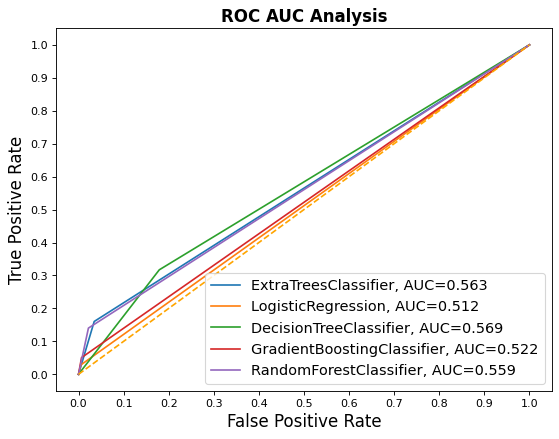

In [57]:
fig = plt.figure(figsize=(8,6), dpi=80)
for clf_name in perf_df.index:
    plt.plot(perf_df.loc[clf_name]["fpr"], 
             perf_df.loc[clf_name]["tpr"], 
             label="{}, AUC={:.3f}".format(clf_name, perf_df.loc[clf_name]["auc"]))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title("ROC AUC Analysis", fontweight="bold", fontsize=15)
plt.legend(prop={"size":13}, loc="lower right")

plt.show()
fig.savefig("data/Img/05_10_Classifiers_ROC_AUC.png")

## Conclusion

Including non-weather features in our modeling notably improved results. Our highest AUC score with weather data only was 0.523, including additional features increased our best result to 0.569. 